In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats

warnings.simplefilter(action='ignore', category=FutureWarning)

# Neveras Cleaning

Autors:
Arnau Finol Peñalver i Arnau Gusart Verdú

## 1 Descripció dataset

En aquest treball, s'ha realitzat la neteja, preparació i anàlisis d'un dataset que conté dades sobre un conjunt d'electrodomèstics, en concret inclou les característiques tècniques i els preus de neveres. Aquest el vam extreure de la web electrocosto.com en la primera pràctica.  Aquest conjunt de dades que es pot trobar tant al nostre repositori de GitHub com a Zenodo.  Sota el nom neveras.csv. Enllaç: https://doi.org/10.5281/zenodo.7863333. 

 Aquest dataset serà útil per explorar i comprendre millor el mercat de les neveres, i per respondre a diverses preguntes clau que poden interessar a les empreses consumidores, distribuïdores i els compradors.

Per exemple, podem explorar quines característiques tenen més impacte en el preu d'una nevera i si hi ha una relació entre el preu i la marca del fabricant. Podem identificar quines són les característiques més comunes en les neveres actuals, informació que pot ser d'utilitat en el disseny d'un nou producte.  A més, podem analitzar la distribució de preus per a diferents tipus de neveres i determinar si hi ha segments específics de preu en el mercat. Podem estudiar quin podria ser un possible preu òptim per a una nova nevera. Així com estudiar quines neveres proporcionen els millors preus en relació amb les característiques que ofereixen.

Tots aquests coneixements poden ajudar als fabricants de neveres a prendre decisions informades sobre el disseny i el preu dels seus productes, així com als consumidors a identificar millor les opcions disponibles i a prendre decisions de compra intel·ligents.

In [2]:
# Read csv file
raw_df = pd.read_csv('neveras.csv', decimal=",")

In [3]:
#Rows and columns info
print(f'El data frame conté {len(raw_df.index)} mostres.')
print(f'Cada mostra disposa de {len(raw_df.columns)} atributs')

El data frame conté 488 mostres.
Cada mostra disposa de 136 atributs


Disposem de 136 variables, aquest és un nombre considerable de variables i per tant sera inevitable prescindir de moltes d'elles. En el que segeix de treball seleccionarem les variables que aporten més informació i les que puguin ser d'utilitat per tal de transformar el dataset cru del que partim en un dataset net llest per a la creacció de models. 

In [4]:
# Var list and missig values
missing_values = raw_df.isna().sum()
missing_values[missing_values < 50].sort_values()

product-name               0
product-sending-value      0
val-quantity               0
val-points                 0
date                       0
ref                        0
price                      0
product-type               0
marca                      0
Garantía                   5
Anchuraexacta              5
Alturaexacta               5
Númerodepuertas            8
Tipodeinstalación          9
Alimentación              10
ConsumoAnualdeEnergía     12
Altura                    12
Capacidadfrigorífico      12
Anchura                   13
BaldasenRefrigerador      16
EficienciaNueva           22
Profundidad               23
Ruido                     24
Color/material            25
Refrigeración             25
ReguladordeTemperatura    35
Tirador                   39
Cajones/Cestas            43
Peso                      45
Iluminación               47
PosicióndelosControles    49
dtype: int64

Moltes variables contenen força valors nuls. Donat l'alt nombre de variables utilitzarem el nombre de valors nuls com a criteri per realitzar una subselecció de variables. En el que seguiex d'informe treballarem sobre les variables que contenen 25 o menys valor nuls. Aquest valor representa aproximadament un 5% de les mostres(488).

## 2 Integració i selecció

En aquesta secció hem analitzat les 26 variables que passen el tall del nombre de valors nuls proposat. Primer de tot, s'exposen quines variables, que pasen el tall, també han estat descartades i els motius pels quals ens hem decantat per aquesta decisió en cada una d'elles. La resta de variables han estat considerades interesants per a seguir estudiant-les amb més profunditat, és per aixó que al final de la secció, hem adequat el format de cada una d'elles i les hem inclos en un nou dataframe anomenta clean_df.

### Variables descartades

Primer de tot mostrem els primer valors de les variables descartades per tal de fer-nos una idea de que conté cada una d'elles.

In [5]:
# Mostrem els primer valors de les variables descartades
raw_df[['product-name','ref','product-type','date','Alimentación',
        'val-quantity','val-points','Altura','Anchura']].head().transpose()

,0,1,2,3,4
product-name,TEKA NFL 320 C INOX - Frigorífico Combi No Frost,INDESIT TAA 5 1 BLANCO - Frigorífico Dos Puert...,INDESIT LI8 SN2E X Inox - Frigorífico Combi No...,TEKA NFL-320 Blanco - Frigorífico Combi No Frost,KROMSLINE KC-185-DW BLANCO - Frigorífico Combi...
ref,115216026,14760137,14762233,115214386,702139949
product-type,frigorificos,frigorificos,frigorificos,frigorificos,frigorificos
date,2023-04-24,2023-04-24,2023-04-24,2023-04-24,2023-04-24
Alimentación,230V,230V,230V,230V,230V
val-quantity,(20),(6),(2),(12),(0)
val-points,4.7,4.83,5.0,4.73,0.0
Altura,181 a 190,176 a 180 cm,181 a 190,181 a 190,181 a 190
Anchura,55 a 60 cm,66 a 70 cm,55 a 60 cm,55 a 60 cm,55 a 60 cm


La variable product-name conte el nom del producte i la variable ref conté un valor numeric referencia al producte. Aquestes dues variables són una etiqueta identificativa i no constitueixen una caracteristica descriptiva de producte. Volem seleccionar les variables que descriuen el productes i per tant les descartem.

In [6]:
# Mostrem els valors únics
print(raw_df['product-type'].unique())
print(raw_df['date'].unique())
print(raw_df['Alimentación'].unique())

['frigorificos']
['2023-04-24']
['230V' nan ' 230V' '230V ']


Les variables product-type i date contenen un mateix valor per a totes mostres, degut a la manca de variancia no aporten informacó en la creació d'un futur model. Succeeix el mateix en el cas de la variable alimentació, totes els electrodomestics extrets d'aquesta font son per al mercat europeu i funcionen a una font d'alimentació de 230V.

Les variables val-quantity i val-points estan estricatament relacionades, la variables val-quantity indica el nombre de valoracions total de cada producte, metre que val-points és la mitjana de les valoracions. Si un producte no te cap valoració se li assigna per defecte una nota mitja de 0.

In [7]:
# Netejem i guardem la variable val-quantity en una variable separada
val_quantity = raw_df['val-quantity'].str.replace('(', '').str.replace(')', '').astype('Int64')

In [8]:
# Taula de freqüències
val_quantity.value_counts()

0     428
1      23
2       9
6       5
3       5
4       5
10      3
8       2
5       2
7       2
20      1
12      1
13      1
14      1
Name: val-quantity, dtype: Int64

Hi ha 428 items que no tenen cap valoració. La variable val-point ha passat el tall dels nuls degut a que en aquesta variable els valors nuls ha estat codificats amb el valor 0.

Aquestes tipus de variables poden ser molts útils per a la creació d'un model ja que aporten l'opinió del clients sobre els productes. En aquest cas, degut a la manca generalitzada de valoracions considerem que els valors no resulten prou fiables per tenir-los en compte.


Observem a continuació els primer valors de les variables Alturaexacta i Altura.

In [9]:
raw_df[['Alturaexacta','Altura']].head()

,Alturaexacta,Altura
0,188 Centímetros,181 a 190
1,180 Centímetros,176 a 180 cm
2,189 Centímetros,181 a 190
3,188 Centímetros,181 a 190
4,185 Centímetros,181 a 190


A priori, les variables Alturaexacta i Altura representen la meteixa informació, amb la diferencia que una és una variable númerica i l'altre categorica. Calculem a continuació la correlació entre ambdues:

In [10]:
aux_df = pd.DataFrame()
aux_df["Altura"] = pd.Categorical(raw_df["Altura"])
aux_df["Alturaexacta"] = pd.Categorical(raw_df["Alturaexacta"])

corr = aux_df["Altura"].cat.codes.corr(aux_df["Alturaexacta"].cat.codes)

corr

0.886325742819265

Com era d'esperar aquests dues variables tenen una correlació molt elevada Decidim descartar la variable altura ja que aporta una informació menys precisa, en forma de rang i conte més valors nuls.

Es dona el mateix cas entre les variables Anchura i Anchuraexacta. Pel mateix motiu, decidim descartar la variable Anchura.

### Variables seleccionades i adeqüació del format

Creem un nou dataframe per guardar les variables que han estat seleccionades.

In [11]:
# df per guardar les variables seleccionades
clean_df = pd.DataFrame()

Observem els primer valors de les variables selecionades per tal de fer-nos una idea de que conté cada una d'elles

In [12]:
# Mostrem els primer valors de les variables seleccionades
raw_df[['price','marca','product-sending-value','Garantía','Alturaexacta','Anchuraexacta',
        'Númerodepuertas','Tipodeinstalación','ConsumoAnualdeEnergía',
        'Capacidadfrigorífico','BaldasenRefrigerador','EficienciaNueva',
        'Profundidad','Ruido','Refrigeración','Color/material']].head().transpose()

,0,1,2,3,4
price,"418,49 €","393,49 €","437,49 €","406,49 €","455,20 €"
marca,TEKA,INDESIT,INDESIT,TEKA,KROMSLINE
product-sending-value,"37,00 €","37,00 €","37,00 €","37,00 €","37,00 €"
Garantía,3 Años,3 Años,3 Años,3 Años,5 Años
Alturaexacta,188 Centímetros,180 Centímetros,189 Centímetros,188 Centímetros,185 Centímetros
Anchuraexacta,60 Centímetros,70 Centímetros,60 Centímetros,60 Centímetros,60 Centímetros
Númerodepuertas,2 Puertas,2 Puertas,2 Puertas,2 Puertas,2 Puertas
Tipodeinstalación,Libre,Libre,Libre,Libre,Libre
ConsumoAnualdeEnergía,293 Kwh/Año,282 Kwh/Año,247 Kwh/Año,293 Kwh/Año,256 Kwh/Año
Capacidadfrigorífico,224 Litros,333 Litros,230 Litros,224 Litros,211 Litros


La majoria d'aquestes variables contenen les unitats i estan en format string quan es tracta d'una variable númerica. Procedim a adequar el farmat de cada una d'elles i les afegim al nou dataframe 

In [13]:
# Seleccionem i addecuem el format
clean_df['precio'] = raw_df['price'].str.replace('.', '').str.replace(',', '.').str.replace(' €', '').astype(float)
clean_df['marca'] = raw_df['marca']
clean_df['gastos_envio'] = raw_df['product-sending-value'].str.replace('.', '').str.replace(',', '.').str.replace(' €', '').astype(float)
clean_df['garantía'] = raw_df['Garantía'].str.replace(' Años', '').astype('Int64')
clean_df['altura'] = raw_df['Alturaexacta'].str.replace('.', '').str.replace(' Centímetros', '').astype(float)
clean_df['anchura'] = raw_df['Anchuraexacta'].str.replace('.', '').str.replace(' Centímetros', '').astype(float)
clean_df['profundidad'] = raw_df['Profundidad'].str.replace(' Centímetros', '').astype(float)
clean_df['capacidad'] = raw_df['Capacidadfrigorífico'].str.replace(' Litros', '').str.replace('\\r', '').astype(float)
clean_df['puertas'] = raw_df['Númerodepuertas'].str.replace(" Puertas", "").astype('Int64')
clean_df['baldas'] = raw_df['BaldasenRefrigerador'].str.replace(' Baldas', '').str.replace(' ', '').astype('Int64')
clean_df['instalación'] = raw_df['Tipodeinstalación'].str.replace(' ', '')
clean_df['consumo_anual'] = raw_df['ConsumoAnualdeEnergía'].str.replace(' Kwh/Año', '').astype(float)
clean_df['eficiencia'] = raw_df['EficienciaNueva'].str.replace(' ', '')
clean_df['ruido'] = raw_df['Ruido'].str.replace(' Decibelios', '').astype('Int64')
clean_df['refrigeración'] = raw_df['Refrigeración'].str.replace(" ", "")
clean_df['color'] = raw_df['Color/material'].str.replace(" ", "")

In [14]:
# Mostrem els primer valors de les variables ade
clean_df.head().transpose()

,0,1,2,3,4
precio,418.49,393.49,437.49,406.49,455.2
marca,TEKA,INDESIT,INDESIT,TEKA,KROMSLINE
gastos_envio,37.0,37.0,37.0,37.0,37.0
garantía,3,3,3,3,5
altura,188.0,180.0,189.0,188.0,185.0
anchura,60.0,70.0,60.0,60.0,60.0
profundidad,64.0,69.0,66.0,64.0,66.0
capacidad,224.0,333.0,230.0,224.0,211.0
puertas,2,2,2,2,2
baldas,4,5,4,<NA>,4


El dataframe clean_df conte 16 variables i ja no conte cap unitat.

## 3 Neteja de les dades

Com ja em vist abans algunes de les variables contenen valors nuls. En aquest apartat gestionarem aquest valors nuls i analitzarem si existeixen valors extrems que són errors de les dades, en cas que existexin els gestionarem de la forma adecuada.

Separem el dataframe en dos, ja que gestionarem de forma diferent les varables categoriques i les numeriques. Algunes variables categoriques estanrepresentades per un valor numeric.

In [15]:
# Separem en dos df
cat_df = clean_df[['marca', 'puertas', 'baldas' ,'instalación',
                    'eficiencia', 'refrigeración', 'color']]
num_df = clean_df[['precio', 'gastos_envio','garantía', 'altura', 'anchura',
                    'profundidad', 'capacidad', 'consumo_anual', 'ruido']]

### Valors extrems

Començarem amb els valors extrems perquè alguns d'ells no existeix una millor manera de gestionar-los que computar-los com a valors perduts i gestionar-los posteriorment com a tals.

Imprimim els valors únics de les variables catecoriques per veure si hi ha algun valor incorrecte o que no pertanyi als subconjunts de valors possibles de la categoria.

In [16]:
for var_name in cat_df.columns:
    print(f'Valors únics variable {var_name}:')
    print(f'{cat_df[var_name].dropna().unique().tolist()} \n')

Valors únics variable marca:
['TEKA', 'INDESIT', 'KROMSLINE', 'BOSCH', 'BALAY', 'SMEG', 'WINIA', 'LG', 'SIEMENS', 'FAGOR', 'BEKO', 'ARISTON HOTPOINT', 'EDESA', 'ROMMER', 'CATA', 'NIBELS', 'BUTSIR'] 

Valors únics variable puertas:
[2, 4, 1, 3, 0] 

Valors únics variable baldas:
[4, 5, 3, 7, 6, 2, 0] 

Valors únics variable instalación:
['Libre', 'Integrable'] 

Valors únics variable eficiencia:
['F', 'E', 'D', 'C', 'B', 'A'] 

Valors únics variable refrigeración:
['NoFrost', 'Cíclico', 'LowFrost', 'Estático', 'Defrost'] 

Valors únics variable color:
['Inox', 'Blanco', 'Azul', 'Negro', 'Gris', 'AceroMate', 'Verde', 'Rojo', 'Amarillo', 'Lima', 'Plata', 'Naranja', 'Crema', 'Antracita', 'Rosa', 'Marrón'] 



Observem que hi ha algunes neveres amb 0 portes i d'altres sense cap prestatge. Aquestes dues varaibles no contenen el valor 0 en el seu rang ja que com a minim etindran una porta dos prestatge. Transformem aquests valors en valors nulls.

In [17]:
clean_df['puertas'] = clean_df['puertas'].replace([0], np.nan)

In [18]:
clean_df['baldas'] = clean_df['baldas'].replace([0], np.nan)

Pasem a analitzar si existeixen outliers dins les variables númeriques. Per fer-ho, primer de tot imprimim diferents metriques. 

In [19]:
num_df.describe()

,precio,gastos_envio,garantía,altura,anchura,profundidad,capacidad,consumo_anual,ruido
count,488.000000,488.000000,483.0,483.000000,483.000000,465.000000,476.000000,476.000000,464.0
mean,1156.760533,40.780738,3.099379,184.320911,65.629400,68.784946,262.542017,228.680672,38.915948
std,1072.801184,11.874562,0.578361,95.754714,25.491544,35.600468,76.325758,87.729170,10.495059
min,161.490000,37.000000,3.0,2.000000,40.000000,0.000000,26.000000,0.000000,29.0
25%,565.490000,37.000000,3.0,176.000000,60.000000,65.000000,222.000000,168.000000,36.0
50%,912.960000,37.000000,3.0,186.000000,60.000000,66.000000,244.000000,232.000000,39.0
75%,1407.990000,37.000000,3.0,197.000000,60.000000,73.000000,319.000000,265.250000,40.0
max,9317.080000,78.000000,10.0,2030.000000,540.000000,815.000000,479.000000,936.000000,254.0


Observem que el valor minim en el consum anual es de 0, consum erroni molt probablement ens trobem davant d'un valor nul codificat amb un 0. Per altra banda, també observem que el valor maxim de la variable soroll es de 254db, un valor molt per sobre del que podem soportar i que ens indica que aquesta variable conté valors extrems. Observem també que la nevera més cara val mes de nou mil euros una quantitat força elevada. Per ultim, el valor minim de la variable altura es 2 centimetres, una mesura extremadament baixa per a una nevera.

In [20]:
#Substituim el 0 a la variable consum per nan
clean_df['consumo_anual'] = clean_df['consumo_anual'].replace([0], np.nan)

In [21]:
for var_name in num_df.columns:
    print(f'{var_name}: {len(num_df[var_name].unique())}')

precio: 363
gastos_envio: 2
garantía: 4
altura: 61
anchura: 27
profundidad: 36
capacidad: 118
consumo_anual: 144
ruido: 18


Observem que hi ha variables amb un nombre reduit de valors diferents. Imprimim les frèquencies de les variables gastos_envio i garantía.

In [22]:
print(clean_df['gastos_envio'].value_counts())

37.0    443
78.0     45
Name: gastos_envio, dtype: int64


In [23]:
print(clean_df['garantía'].value_counts())

3     464
5      17
10      2
Name: garantía, dtype: Int64


Per detectar millor els outliers definirem una funció que cerca els valors a més de 2 desviacions estàndard de la mitjana.

In [24]:
def search_outliers(values, std_times = 3):
    z_scores = (values - np.mean(values)) / np.std(values)
    outliers = values[np.abs(z_scores) > std_times]
    return np.sort(outliers.unique())

In [25]:
for var_name in num_df.columns:
    print(f'{var_name}: {search_outliers(num_df[var_name])}')

precio: [4493.78 4936.49 9317.08]
gastos_envio: [78.]
garantía: [5 10]
altura: [ 970. 2030.]
anchura: [179. 540.]
profundidad: [815.]
capacidad: [26.]
consumo_anual: [936.]
ruido: [74 254]


A continuació gestionarem els possibles outliers que em trobat a cada variable.

Respecte les despeses d'enviament, ja em vist abans que consta de dos possibles valors, el 78 apareix com un possible outlier ja que es el valor minoritari i esta allunyat de la mitjana. Amb la variable garantia succeix el mateix, hi ha tres valors diferents, 3 anys de garantia es el valor predominat, d'aquesta forma els valors 5 i 10 queden allunyat de la mitjana. Tot i que aqueste variables estan codificades numericament, les podem considerar com a categoriques degut al reduit nombre de valors diferents.

En el cas de les dimensions hem vist al començament de l'infome contem amb variables que codifiquen les dimensions de les neveres en forma de rang, podem recuperar-les per comprabar quin valor apareix en aquestes variables. Tot i que no sort al test que em fet, tenim pendent gestionar un valor d'alçada molt petit.

In [26]:
raw_df[["Altura", "Alturaexacta"]].loc[clean_df['altura'] < 20]

,Altura,Alturaexacta
267,Mayor de 200 cm,2 Centímetros
291,NaN,2 Centímetros


Observem que en realitat aquesta variable està en metres i ho solucionem.

In [27]:
clean_df.loc[clean_df['altura'] == 2, 'altura'] = 200

In [28]:
raw_df[["Altura", "Alturaexacta"]].loc[clean_df['altura'] >= 970]

,Altura,Alturaexacta
199,Mayor de 200 cm,2.030 Centímetros
413,50 a 100 cm,970 Centímetros


In [29]:
raw_df[["Anchura", "Anchuraexacta"]].loc[clean_df['anchura'] >= 179]

,Anchura,Anchuraexacta
386,Mayor de 90 cm,179 Centímetros
447,51 a 54 cm,540 Centímetros


Hi ha hagut un error en les unitats. Mitjançant les dades de les variables amb rang de les dimensions intuim que en els valors 2030, 970 i 540 hi ha un error en les unitats i sobra un 0 al final. Metre que el valor 179 entra dins d'un rang raonable.

In [30]:
clean_df.loc[clean_df['altura'] >= 970, 'altura'] /= 10
clean_df.loc[clean_df['anchura'] == 540, 'anchura'] = 54

En el cas de la profunditat veiem que no tenim una variable categòrica per comparar.

In [31]:
clean_df[["altura", "anchura", "profundidad"]].loc[clean_df['profundidad'] >= 815]

,altura,anchura,profundidad
360,87.0,128.0,815.0


Tenint en compte la resta de dimensions de la nevera podem asumir que succeeix el mateix.

In [32]:
clean_df.loc[clean_df['profundidad'] == 815, 'profundidad'] = 81.5

Pel que fa a la capacitat, 26 litres és un valor massa allunyat de la resta i el tractem com un valor perdut, deu haver algun tipus d'error.

In [33]:
clean_df.loc[clean_df['capacidad'] == 815, 'capacidad'] = np.nan

En el cas del soroll veiem que els valors 74 i 254 dB són un nivells de soroll considerables. Tal com habiem comentat 254 db és insoportable, per altra banda 74 es també un soroll massa elevat per a una nevera. Descartem els dos valors i els convertim en valors nulls.

In [34]:
clean_df.loc[clean_df['ruido'] >= 74, 'ruido'] = np.nan

En la categoria de preu observem que hi ha articles força més cars que la resta. Tractantse de la variable objectiu decidim prescindir d'aquest registres.

In [35]:
clean_df = clean_df[clean_df['precio'] < 4493.78]

### Valors perduts

In [36]:
missing_values = clean_df[clean_df.columns].isnull().sum()
missing_values[missing_values > 0].sort_values()

garantía          5
altura            5
anchura           5
instalación       9
puertas          11
capacidad        12
baldas           12
consumo_anual    13
eficiencia       22
profundidad      23
refrigeración    25
color            25
ruido            26
dtype: int64

Per gestionar els nuls en el cas de les variables numèriques podem omplir els valors nuls amb el valor de la mitjana.

In [39]:
def fill_na_mean(data, column):
    average = data[column].dropna().mean()
    data[column] = data[column].fillna(round(average))
    return

In [40]:
for column in ['altura', 'anchura', 'capacidad', 'consumo_anual','profundidad', 'ruido']:
    fill_na_mean(clean_df, column)

Per finalitzar gestionarem els valors nulls de les variables categoriques

In [41]:
for var in ['garantía', 'instalación', 'puertas', 'baldas','eficiencia', 'refrigeración', 'color']:
    print(clean_df[var].value_counts())

3     455
5      17
10      2
Name: garantía, dtype: Int64
Libre         446
Integrable     24
Name: instalación, dtype: int64
2    355
1     91
4     20
3      2
Name: puertas, dtype: Int64
4    177
3    128
5    126
7     16
2     11
6      9
Name: baldas, dtype: Int64
E    180
D    125
F    116
C     29
B      6
A      1
Name: eficiencia, dtype: int64
NoFrost     305
Cíclico     118
Estático     27
LowFrost      2
Defrost       2
Name: refrigeración, dtype: int64
Inox         180
Blanco       158
Negro         32
Crema         12
Azul          11
Gris          11
Verde          8
Antracita      8
Naranja        7
Rojo           6
Rosa           6
Plata          5
Lima           4
AceroMate      2
Amarillo       2
Marrón         2
Name: color, dtype: int64


En el cas de variables com garantia, puertas o refrigeración, tenim un grup predominant on podem enviar els valors nuls, la majoria de neveres tenen 2 portes, o refrigeració NoFrost. En el cas de la garantía fins i tot podem raonar que per llei tots els electrodomèstics estan obligats a 3 anys mínim. Per tant podem declarar en cas de que no s'indiqui res que sempre tindran 3 anys de garantia.

In [42]:
clean_df['garantía'] = clean_df['garantía'].fillna(3)
clean_df['instalación'] = clean_df['refrigeración'].fillna('Libre')
clean_df['puertas'] = clean_df['puertas'].fillna(2)
clean_df['baldas'] = clean_df['baldas'].fillna(4)
clean_df['eficiencia'] = clean_df['eficiencia'].fillna('E')
clean_df['refrigeración'] = clean_df['refrigeración'].fillna('NoFrost')
clean_df['color'] = clean_df['color'].fillna('Inox')

Finalment, comprovem que cap de les variables conte valors nuls.

In [43]:
clean_df[clean_df.columns].isnull().sum()

precio           0
marca            0
gastos_envio     0
garantía         0
altura           0
anchura          0
profundidad      0
capacidad        0
puertas          0
baldas           0
instalación      0
consumo_anual    0
eficiencia       0
ruido            0
refrigeración    0
color            0
dtype: int64

## 4 Analisi de les dades

Per realitzar l'anàlisi de les dades anem a definir un nou dataframe sobre el que treballarem, en aquest aprofitarem per convertir les variables categòriques en factors numèrics per poder realitzar proves estadístiques.

In [44]:
analysis_df = clean_df.copy()

df_object_columns = analysis_df.select_dtypes(include=['object'])
analysis_df[df_object_columns.columns] = df_object_columns.astype('category')

Anem a comprovar si es compleix que tenim una distribució normal de les dades realitzant el test de Wilk-Shapiro. D'aquesta manera ho veurem més clarament que en una representació gràfica i si obtenim p-values més grans que alfa veurem clarament que és el cas.

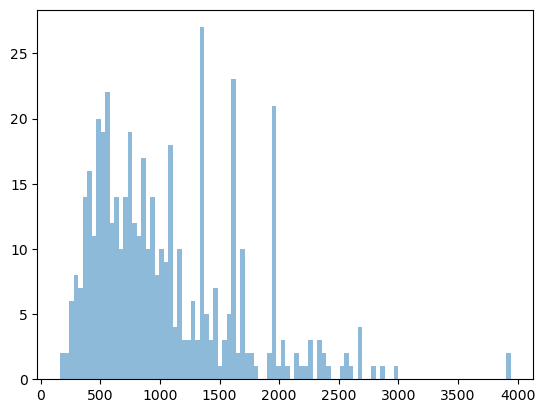

In [45]:
plt.hist(analysis_df['precio'], bins=100, alpha=0.5, label='precio')
plt.show()

In [46]:
def get_pvalue(data):
    _, p_value = stats.shapiro(data)
    return p_value
print('Shapiro-Wilk Test - p-value')
for column in analysis_df.columns:
    if analysis_df[column].dtype.name == 'category':
        original_values = analysis_df[column].cat.codes.astype('float')
        p_value = format(get_pvalue(original_values), ".2e")
    else:
        p_value = format(get_pvalue(analysis_df[column]), ".2e")
    print(f'\t {column} = {p_value}')

Shapiro-Wilk Test - p-value
	 precio = 5.04e-16
	 marca = 4.23e-20
	 gastos_envio = 2.09e-38
	 garantía = 1.71e-41
	 altura = 6.90e-26
	 anchura = 2.41e-31
	 profundidad = 5.28e-23
	 capacidad = 3.26e-09
	 puertas = 6.60e-32
	 baldas = 7.45e-19
	 instalación = 4.09e-30
	 consumo_anual = 4.74e-17
	 eficiencia = 1.14e-19
	 ruido = 2.92e-15
	 refrigeración = 1.18e-31
	 color = 6.28e-21


Veiem que tenim p-values molt petits, tenint en compte que alfa ronda entre 0.05 i 0.1. Això vol dir que no tenim distribució normal de les dades. Amb algunes variables es pot veure molt clarament de forma gràfica.

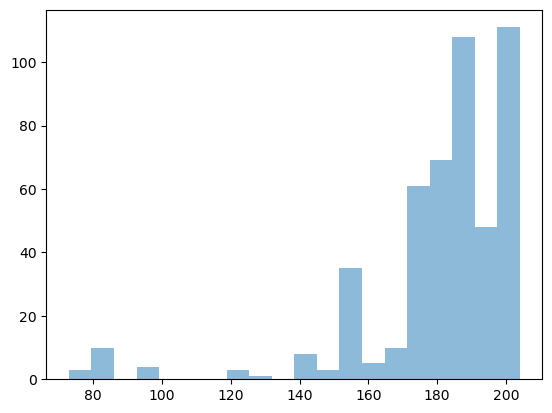

In [47]:
plt.hist(analysis_df['altura'], bins=20, alpha=0.5, label='precio')
plt.show()

Així doncs haurem de realitzar tests que no asumeixin que la distribució de dades és normal.
Un exemple d'aquests tests és el Test d'Spearman que ens permet comparar la correlació entre dues variables.

In [48]:
group1 = analysis_df['precio']
group2 = analysis_df['altura']

correlation, p_value = stats.spearmanr(group1, group2)

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.10975640265638936
P-value: 0.01625566760089213


Aquest test ens dona 2 valors. La correlació entre les dues columnes, i un P-value, que si és més petit que alfa vol dir que les diferències entre els valors esperats i els observats no son causa de l'atzar.

En aquest cas veiem que per una banda el P-value es més gran que alfa = 0.5 i no hi ha correlació.

En cas de tenir dues variables categòriques podem fer servir el test de Chi Quadrat per trobar si hi ha una relació significativa entre elles.

In [49]:
group1 = analysis_df['eficiencia']
group2 = analysis_df['marca']

contingency_table = pd.crosstab(group1, group2)

# Perform the Chi-Square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test - Chi2: {chi2}")
print(f"Chi-Square Test - p-value: {p_value}")

Chi-Square Test - Chi2: 315.6186326127997
Chi-Square Test - p-value: 1.0092115345862639e-29


En cas de tenir una variable numèrica i una categòrica podem fer servir el test Kruskal-Wallis.

In [50]:
group1 = analysis_df['precio']
group2 = analysis_df['eficiencia'].cat.codes

statistic, p_value = stats.kruskal(group1, group2)

print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

Statistic: 727.5227299089528
P-value: 3.096480409796458e-160


En aquests dos casos passa una cosa similar la diferència es que el valor que calculem per veure si hi ha una associació entre les columnes no ens indica la força d'aquesta ni la direcció. Per calcular això caldria aprofundir més amb altres proves estadístiques.

En el cas de Chi-Quadrat veiem que el P-valor és petit i Chi2 és gran. Això vol dir que si que tenim algun tipus d'associació entre les variables.

En el cas de KW veiem que passa el mateix tenim una Statistic molt gran i un P-valor molt petit.

Com hem comentat una manera de trobar la relació d'aquestes associacions en el cas de dues variables categòriques seria la V de Cramer que ens pot indicar la força d'aquesta associació:

In [51]:
def calculate_cramers_v(contingency_table):
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k, r = contingency_table.shape
    # formula de la v de Cramer
    v = np.sqrt(chi2 / (n * (min(k, r) - 1)))
    return v

cramers_v = calculate_cramers_v(contingency_table)
print("V de Cramer:", cramers_v)

V de Cramer: 0.36301833296401825


En el cas de KW podem calcular Eta quadrat per estudiar quin percentatge de la variança de la nostra variable independent continua, que en el nostre cas serà el preu depen de la variable categòrica. Podem calcular-ho manualment de la forma següent:

In [89]:
group1 = analysis_df['precio']
group2 = analysis_df['eficiencia'].cat.codes

h_statistic, p_value = stats.kruskal(*[group1[group2 == group] for group in group2.unique()])
n_groups = len(group2.unique())
eta_squared = (h_statistic - (n_groups - 1)) / (analysis_df.shape[0] - n_groups)

print('Eta Squared:', eta_squared)

Eta Squared: 0.22110832055058122


Podem doncs fer aquestes proves amb totes les columnes per trobar si hi ha associacions notables notable.

In [80]:
# definim els diccionaris on guardarem les dades
results_num, results_cat, results_mixed = dict(), dict(), dict()

# analitzem els parells de columnes i segons el seu tipus apliquem una prova o una altra
for i, col1 in enumerate(analysis_df.columns):
    for col2 in analysis_df.columns[i+1:]:
        
        if analysis_df[col1].dtype == 'category' and analysis_df[col2].dtype == 'category':
            if analysis_df[col1].dtype == 'category':
                contingency_table = pd.crosstab(analysis_df[col1], analysis_df[col2])
                chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
                if p_value < 0.05:
                    n = contingency_table.sum().sum()
                    k, r = contingency_table.shape    
                    v = np.sqrt(chi2 / (n * (min(k, r) - 1)))
                    results_cat[f'{col1}-{col2}'] = v
                    
        elif analysis_df[col1].dtype == 'category' or analysis_df[col2].dtype == 'category':
            if analysis_df[col1].dtype == 'category' and col2 == 'precio':
                group2 = analysis_df[col1].cat.codes
                group1 = analysis_df[col2]
                col2 = col1
                col1 = 'precio'
            elif col1 == 'precio':
                group1 = analysis_df[col1]
                group2 = analysis_df[col2].cat.codes
            else:
                continue
            h_statistic, p_value = stats.kruskal(*[group1[group2 == group] for group in group2.unique()])
            n_groups = len(group2.unique())
            eta_squared = (h_statistic - (n_groups - 1)) / (analysis_df.shape[0] - n_groups)
            if p_value < 0.05:
                results_mixed[f'{col1}-{col2}'] = eta_squared
                
        else:
            correlation, p_value = stats.spearmanr(analysis_df[col1], analysis_df[col2])
            if abs(correlation) > 0.5 and p_value < 0.05:
                results_num[f'{col1}-{col2}'] = correlation

precio marca
precio instalación
precio eficiencia
precio refrigeración
precio color


In [81]:
stats_num = pd.DataFrame([(key, value) for key, value in results_num.items()], columns=['Column Pair', 'Correlation'])
stats_num.sort_values(by='Correlation', ascending=False)

,Column Pair,Correlation
3,anchura-capacidad,0.732595
0,precio-profundidad,0.659016
4,puertas-consumo_anual,0.654486
2,anchura-profundidad,0.609141
5,consumo_anual-ruido,0.550203
1,altura-baldas,0.500311


Expressan-t'ho d'aquesta forma podem extreure algunes conclusions. Principalment ens interessa trobar relacions entre el preu i altres variables pero també podem veure algunes altres relacions interessants:

- Veiem que hi ha una forta correlació entre l'amplada i la capacitat de les neveres, el que té sentit.
- Tenim una correlació forta entre el preu i la profunditat de les neveres.
- Tenim correlació entre el nombre de portes i el consum anual. El que pot implicar o bé que el nombre de portes implica que te més departaments per refredar o que perd més el fred i ha de refrigerar més.
- Hi ha correlació entre l'amplada i la profunditat.
- Hi ha correlació entre el consum i el soroll. Pot implicar que les neveres sorolloses son menys eficients.
- Hi ha correlació entre l'alçada i el nombre de baldes.

In [82]:
stats_cat = pd.DataFrame([(key, value) for key, value in results_cat.items()], columns=['Column Pair', 'Cramer V'])
stats_cat.loc[stats_cat['Cramer V'] >= 0.5].sort_values(by='Cramer V', ascending=False)

,Column Pair,Cramer V
5,instalación-refrigeración,1.0


Entre les variables categòriques podem destacar que hi ha una correlació 1 entre el tipus de instalació i el tipus de refrigeració de les neveres.

In [84]:
stats_mixed = pd.DataFrame([(key, value) for key, value in results_mixed.items()], columns=['Column Pair', 'Eta Squared'])
stats_mixed.sort_values(by='Eta Squared', ascending=False)

,Column Pair,Eta Squared
0,precio-marca,0.567477
4,precio-color,0.287825
2,precio-eficiencia,0.221108
1,precio-instalación,0.059541
3,precio-refrigeración,0.025297


En aquest cas tenim la proporció de la variància que depen de cada variable categòrica. Veiem que la dependència més grossa és la marca seguit del color, el que ens sembla sorprenent, i de l'eficiència de la nevera.

## Conclusions

Creiem doncs que aquest conjunt de dades i aquest estudi si que ens pot permetre entendre millor el mercat de les neveres i com les seves característiques afecten al preu. Hem trobat relacions bastant clares i obvies com per exemple que la mida de la nevera va relacionada a la seva capacitat o que el seu consum anual va relacionat amb seva eficiència. Hem trobat també altres relacions més sorprenents. Que la marca afecti molt al preu té sentit, hi ha marques que busquen fabricar productes per a mercats diferents (clients tradicionals, clients de luxe, empreses...), però en el cas del color si que ens ha sorprès més, la nostra intuició inicial no ens indicaba que hi hagués un efecte gran entre el color i el preu ja que ens semblava una cosa arbitrària. Pensant'hi amb una mica més de detall el que pot passar és que les neveres més tradicionals tinguin colors més senzills i que en el cas dels colors més 'extranys' siguin de neveres de 'luxe'.

Creiem que per acabar d'extreure millors conclusions es podria treballar amb models supervisats agafant com a variable objectiu el preu. D'aquesta manera podriem intentar predir amb unes característiques concretes de nevera per la banda empresarial, en quins rangs de preu podem treballar i quins marges econòmics tenim, i com a clients saber quin es el rang de preu estàndard perque no ens prenguin el pèl.

Finalment extreiem el dataset que hem fet servir per l'anàlisi en format csv

In [78]:
clean_df.to_csv('clean_neveras.csv',index=False)

| Contribucions  | Signatura |
|-----------|-----------|
| Investigació prèvia    | Arnau Finol Peñalver, Arnau Gusart Verdú    |
| Redacció de les respostes    | Arnau Finol Peñalver, Arnau Gusart Verdú    |
| Desenvolupament del codi   |  Arnau Finol Peñalver, Arnau Gusart Verdú   |
| Participació al vídeo     | Arnau Finol Peñalver, Arnau Gusart Verdú   |
